# **Final Project 1 - Linear Regression**

Nama        : Afwa Afini <br>
KMI Batch   : 5 <br>

## 1. Introduction
----

#### 1.1. Background

Uber and Lyft are online transportation services that can be ordered via smartphone. In addition to offering transportation services, Uber and Lyft also offer food delivery services with payment through their applications. 

__Lyft__ Inc. (LYFT) launched as a service in 2012. The servoce was born out of Zimride, a company founded by Logan Green and John Zimmer. Lyft operates in the United States and Canada.

__Uber__ was founded in 2009 by Travis Kalanick and Garrett Camp as UberCab. Uber not only serves in the United States and Canada, but also provides services in many cities around the world, including in the European Union, Central and South America, Africa, Asia, Australia, and New Zealand.

In addition to the coverage area, there are some differences between Uber and Lyft:
- Price: The prices offered by Lyft on transportation services are lower than Uber.
- Applications: Uber's features are better and more innovative.
- Vehicle Types: The types of vehicles offered by Uber are more than Lyft.
- Customer Service: CS provided by Lyft is better and friendly than Uber which tends to be professional.

In Linear Regression modeling, we can use such as coverage area, distance, time, price, and other variables that have been collected in a dataset to perform. By comparing data from Uber and Lyft we can make a price prediction to be able to compare between the predicted proce and the original price and obtain the approriate accucracy.

#### 1.2. Dataset
The dataset used for this modeling is from Kaggle called __[Uber and Lyft Dataset Boston, MA](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma)__. This dataset contains 693.071 rows and 57 columns. The target attribute is the 'Price' column, while the other attributes are predictors.

#### 1.3. Objectives

This obejctives to be achieved from this modeling are:
- Knowing the factors that can affect the price rates of the two online transportation services.
- Creating machine learning modeling to predict online transportation rates using the Linear Regression method.

## 2. Import Libraries
-----

In [142]:
#Library For DataFrame
import pandas as pd
import numpy as np

#Library for Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster

# Library for analysis
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV,ShuffleSplit
from sklearn.linear_model import Lasso

# To hide warnings
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading
-----

In [143]:
# load the data sources
df = pd.read_csv('rideshare_kaggle.csv')

In [144]:
# View the first 5 data
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

In [145]:
# View the last 5 data
df.tail()

id     timestamp  hour  day  month  \
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone    source destination cab_type  \
693066  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693067  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693068  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693069  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693070  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   

                                  product_id       name  price  distance  \
693066  6f72dfc5-27f1-42e8-84db-ccc7a75f6969     UberXL   13.0       1.0   
693067  55c66225-fbe7-4fd5-9072-eab1ece5e23e      UberX    9.5       1.0   
693068  8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a       Taxi    NaN       1.0   
693069  6d318bcc-22a3-4af6-bddd-b409bfce1546  Black SUV   27.0       1.0   
693070  997acbb5-e102-41e1-b155-9df7de0a73f2   UberPool   10.0       1.0   

        surge_multiplier  latitude  longitude  temperature  \
693066               1.0   42.3519   -71.0643        37.05   
693067               1.0   42.3519   -71.0643        37.05   
693068               1.0   42.3519   -71.0643        37.05   
693069               1.0   42.3519   -71.0643        37.05   
693070               1.0   42.3519   -71.0643        37.05   

        apparentTemperature    short_summary  \
693066                37.05   Partly Cloudy    
693067                37.05   Partly Cloudy    
693068                37.05   Partly Cloudy    
693069                37.05   Partly Cloudy    
693070                37.05   Partly Cloudy    

                                      long_summary  precipIntensity  \
693066   Light rain in the morning and overnight.               0.0   
693067   Light rain in the morning and overnight.               0.0   
693068   Light rain in the morning and overnight.               0.0   
693069   Light rain in the morning and overnight.               0.0   
693070   Light rain in the morning and overnight.               0.0   

        precipProbability  humidity  windSpeed  windGust  windGustTime  \
693066                0.0      0.74       2.34      2.87    1543672800   
693067                0.0      0.74       2.34      2.87    1543672800   
693068                0.0      0.74       2.34      2.87    1543672800   
693069                0.0      0.74       2.34      2.87    1543672800   
693070                0.0      0.74       2.34      2.87    1543672800   

        visibility  temperatureHigh  temperatureHighTime  temperatureLow  \
693066       9.785            44.76           1543690800           34.83   
693067       9.785            44.76           1543690800           34.83   
693068       9.785            44.76           1543690800           34.83   
693069       9.785            44.76           1543690800           34.83   
693070       9.785            44.76           1543690800           34.83   

        temperatureLowTime  apparentTemperatureHigh  \
693066          1543712400                    44.09   
693067          1543712400                    44.09   
693068          1543712400                    44.09   
693069          1543712400                    44.09   
693070          1543712400                    44.09   

        apparentTemperatureHighTime  apparentTemperatureLow  \
693066                   1543690800                   35.48   
693067                   1543690800                   35.48   
693068                   1543690800                   35.48   
693069                   1543690800              

In [146]:
# view data dimensions
df.shape

(693071, 57)

In [147]:
# calculate the unique value
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [148]:
# Understanding the characteristic of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

This dataset contains 57 columns, namely:

- id: unique identification number for each trip
- timestamp: a unique timestamp for the trip marker
- hour: the hour when the trip started
- day: the day when the trip started
- month: month the trip started
datetime: the time when the trip started (in the form YYYY-MM-DD HH-MM-SS)
- timezone: the time zone when the trip starts (only one type is America/New_York)
- source: the starting location of the trip (pick-up point)
- destination: the destination of the trip
- cab_type: type of taxi used on the trip (Uber or Lyft)
- product_id: a unique code to identify the service used.
- name: the name of the service car used
- price: the price charged for the trip
- distance: total distance traveled in miles
- surge_multiplier: trip fare multiplier ratio when demand is high
- latitude: latitude of the starting location of the trip
- longitude: the longitude of the starting location of the trip
- temperature: the temperature at the starting location of the trip
- apparentTemperature: the perceived temperature at the starting location of the trip
- short_summary: a summary of the weather at the starting location.
- long_summary: description of the weather at the starting location.
- precipIntensity: the intensity of precipitation at the starting location of the trip.
- precipProbability: probability of precipitation at the starting location of the trip
- humidity: humidity at the starting location
- windSpeed: wind speed at the starting location of the trip
- windGust: average speed of a wind gust at the starting location of the trip
- windGustTime: the time when the wind surge occurred
- visibility: visibility at the starting location of the trip
- temperatureHigh: the highest temperature at the starting location
- temperatureHighTime: the time that the highest temperature occurred at the starting location of the trip.
- temperatureLow: the lowest temperature at the initial travel location
- temperatureLowTime: the time the lowest temperature occurred at the initial location of the trip.
- apparentTemperatureHigh: the highest temperature perceived at the starting location of the trip.
- apparentTemperatureHighTime: the time of the highest perceived temperature at the starting location of the trip.
- apparentTemperatureLow: the lowest temperature sensed at the starting location of the trip.
- apparentTemperatureLowTime: the time of the lowest perceived temperature at the starting location of the trip.
- icon: weather icon at the starting location
- dewPoint: dew point at the location
- pressure: air pressure in millibars (mb)
- windBearing: wind direction in degrees from the north in a clockwise direction, measured at a height of 10 meters above ground level
- cloudCover: percentage of cloud cover
- uvIndex: ultraviolet radiation index projected at solar noon.
- visibility.1: visibility in miles.
- ozone: ozone concentration
- sunriseTime: sunrise time
- sunsetTime: sunset time
- moonPhase: moon phase on a scale of 0 to 1.
- precipIntensityMax: intensity - maximum precipitation in inches per hour (in/h).
- uvIndexTime: the time when the uvIndex is calculated
- temperatureMin: minimum temperature of the day in Fahrenheit (°F)
- temperatureMinTime: the time when the perceived minimum temperature occurred
temperatureMax: the maximum temperature of the day in Fahrenheit (°F).
- temperatureMaxTime: the time when the maximum perceived temperature occurred.
apparentTemperatureMin: the minimum perceived temperature of the day in Fahrenheit (°F).
- apparentTemperatureMinTime: the time when the perceived minimum temperature occurred.
- apparentTemperatureMax: the maximum temperature sensed on that day in Fahrenheit (°F).
- apparentTemperatureMaxTime: the time when the maximum perceived temperature occurred.


## 4. Data Cleaning
-----

In [149]:
# view empty data
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [150]:
# duplicate clean data
df_clear = df.dropna()

In [151]:
df_clear.shape

(637976, 57)

In [152]:
# view the results of data that has been deleted empty values
df_clear.isnull().sum().sum()

0

In [153]:
# view data duplication
df_clear.duplicated().sum()

0

In [154]:
# displays the new data dimension
df_clear.shape

(637976, 57)

In [155]:
# view the overall column
pd.set_option("display.max.columns", None) 
df_clear.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

   latitude  longitude  temperature  apparentTemperature    short_summary  \
0   42.2148    -71.033        42.34                37.12   Mostly Cloudy    
1   42.2148    -71.033        43.58                37.35            Rain    
2   42.2148    -71.033        38.33                32.93           Clear    
3   42.2148    -71.033        34.38                29.63           Clear    
4   42.2148    -71.033        37.44                30.88   Partly Cloudy    

                                        long_summary  precipIntensity  \
0                          Rain throughout the day.            0.0000   
1   Rain until morning, starting again in the eve...           0.1299   
2                        Light rain in the morning.            0.0000   
3                 Partly cloudy throughout the day.            0.0000   
4                 Mostly cloudy throughout the day.            0.0000   

   precipProbability  humidity  windSpeed  windGust  windGustTime  visibility  \
0                0.0      0.68       8.66      9.17    1545015600      10.000   
1                1.0      0.94      11.98     11.98    1543291200       4.786   
2                0.0      0.75       7.33      7.33    1543334400      10.000   
3                0.0      0.73       5.28      5.28    1543514400      10.000   
4                0.0      0.70       9.14      9.14    1543446000      10.000   

   temperatureHigh  temperatureHighTime  temperatureLow  temperatureLowTime  \
0            43.68           1544968800           34.19          1545048000   
1            47.30           1543251600           42.10          1543298400   
2            47.55           1543320000           33.10          1543402800   
3            45.03           1543510800           28.90          1543579200   
4            42.18           1543420800           36.71          1543478400   

   apparentTemperatureHigh  apparentTemperatureHighTime  \
0                    37.95                   1544968800   
1                    43.92                   1543251600   
2                    44.12                   1543320000   
3                    38.53                   1543510800   
4                    35.75                   1543420800   

   apparentTemperatureLow  apparentTemperatureLowTime                   icon  \
0                   27.39                  1545044400   partly-cloudy-night    
1                   36.20                  1543291200                  rain    
2                   29.11                  1543392000           clear-night    
3                   26.20                  1543575600           clear-night    
4                   30.29                

## 5. Exploration Data Analysis (EDA)
--- 

### 5.1 Analyzing Time Data
Analyzing the number of online transportation usage range in a period of time according to the departure.

#### 5.1.1 Month
Analyze the number of outreach uses of online transportation in the period per month of departure.

In [156]:
# creates a df_transport_name variable containing the total data from the transport_name column
df_trans_month = df_clear['month'].value_counts()
df_trans_month

month
12    374205
11    263771
Name: count, dtype: int64

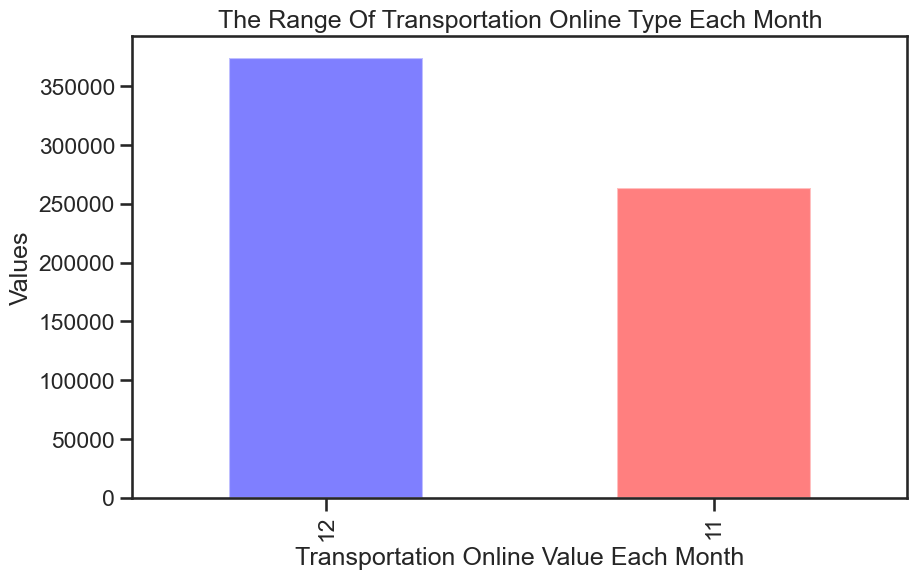

In [157]:
df_trans_month.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Transportation Online Value Each Month')
plt.ylabel('Values')
plt.title('The Range Of Transportation Online Type Each Month')


# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

The graph above shows the range of online transportation usage in the 11th and 12th months. 
- In the 12th month the use of online transportation (Uber and Lyft) reached 374205 users.
- Whereas, in the 11th month the use of online transportation (Uber and Lyft) was at 263771 users.
- The difference in the use of online transportation in these 2 months is approximately 100000 users

#### 5.1.2 Day
Analyze the number of outreach uses of online transportation in a period of time per day of departure.

In [158]:
# see the amount of data every day from the use of online transportation
df_trans_day = df_clear.groupby("day")[["cab_type"]].value_counts().sort_values()
df_trans_day

day  cab_type
9    Lyft          668
     Uber          861
10   Lyft         1212
     Uber         1322
4    Lyft         5704
     Uber         5923
26   Lyft        14000
     Uber        15028
18   Lyft        15958
13   Lyft        17005
18   Uber        17371
13   Uber        18491
17   Lyft        19685
2    Lyft        19845
15   Lyft        19906
30   Lyft        19913
3    Lyft        20021
16   Lyft        20039
14   Lyft        20151
1    Lyft        20289
14   Uber        21193
3    Uber        21302
16   Uber        21320
1    Uber        21391
15   Uber        21426
2    Uber        21453
30   Uber        21631
17   Uber        21669
29   Lyft        26466
     Uber        28756
28   Lyft        32791
27   Lyft        33755
28   Uber        35051
27   Uber        36380
Name: count, dtype: int64

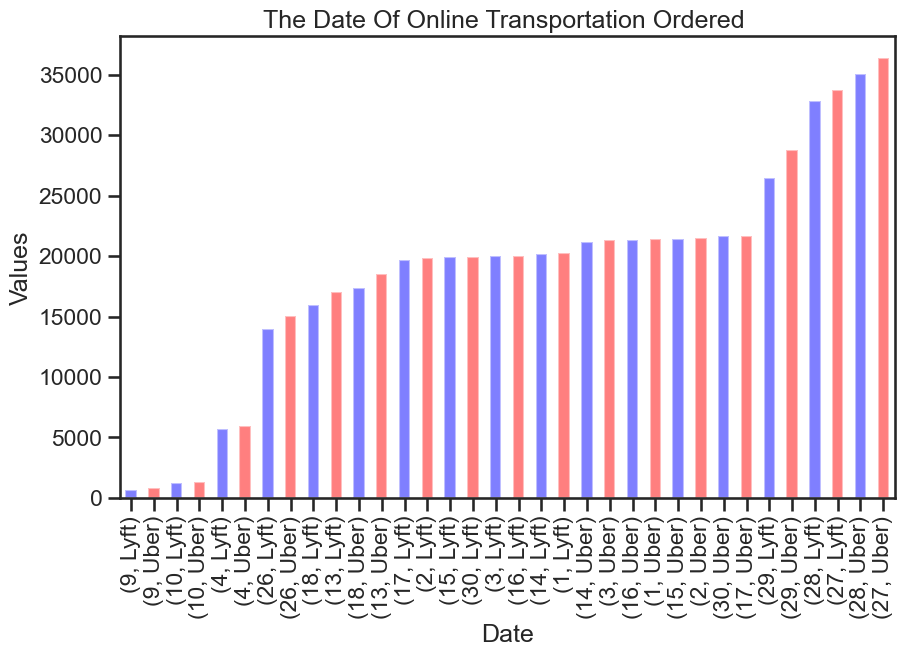

In [159]:
df_trans_day.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('The Date Of Online Transportation Ordered ')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

The graph above shows the daily usage of online transportation (Uber and Lyft).
- Uber's highest usage was 36380 on the 27th and Lyft's highest usage was 33755 on the 27th. The difference between the two transportation users is around 2000 users.
- While Uber's lowest usage was 861 on the 9th and Lyft's lowest usage was 668 on the 29th. The difference between the users of the two transportation is about 150 users.

#### 5.1.3 Hour
Analyze the number of outreach uses of online transportation in the period per hour of departure.

In [160]:
# view hourly order data
df_trans_hour = df_clear.groupby("hour")[["cab_type"]].value_counts().sort_values()
df_trans_hour

hour  cab_type
8     Lyft        10700
7     Lyft        11024
5     Lyft        11155
8     Uber        11637
20    Lyft        11715
5     Uber        11840
7     Uber        11906
6     Lyft        11935
3     Lyft        12224
19    Lyft        12461
21    Lyft        12480
4     Lyft        12502
2     Lyft        12548
1     Lyft        12669
20    Uber        12905
9     Lyft        12948
19    Uber        12949
21    Uber        13069
6     Uber        13212
22    Lyft        13247
3     Uber        13306
14    Lyft        13306
10    Lyft        13325
16    Lyft        13349
11    Lyft        13372
15    Lyft        13394
18    Lyft        13404
13    Lyft        13503
4     Uber        13623
12    Lyft        13633
1     Uber        13641
9     Uber        13725
2     Uber        13775
22    Uber        13846
17    Lyft        13853
23    Lyft        14004
17    Uber        14222
12    Uber        14384
15    Uber        14474
13    Uber        14474
18    Uber        14554
1

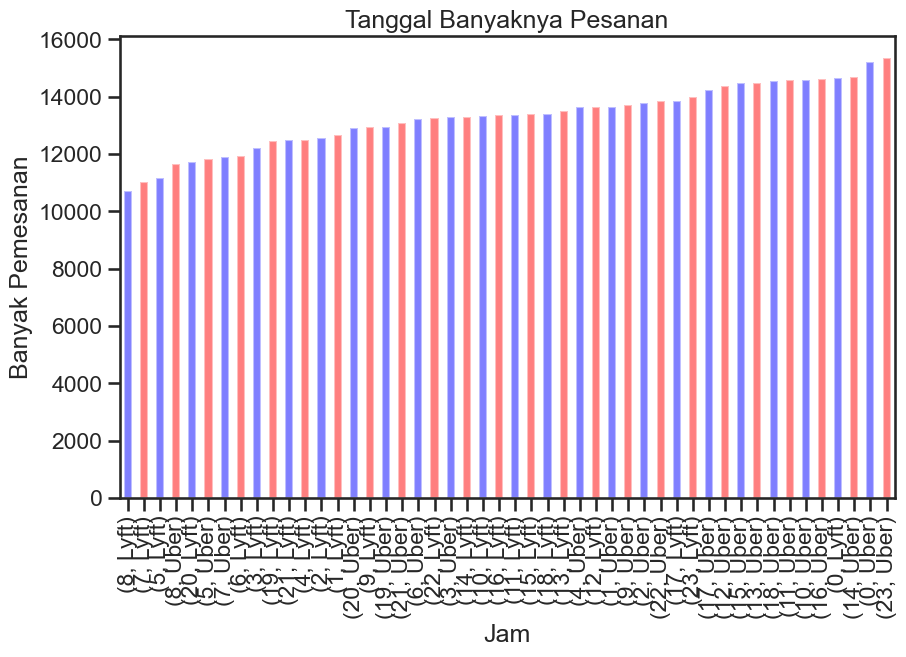

In [161]:
df_trans_hour.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Jam')
plt.ylabel('Banyak Pemesanan')
plt.title('Tanggal Banyaknya Pesanan')


# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

The graph above shows the number of uses of online transportation (Uber and Lyft) according to the departure time.
- Uber has the highest number of uses at departure time 23.00 with a total of 15351 users, and the lowest at departure time 08.00 with a total of 11637 users.
- Lyft had the highest number of uses at departure time 00.00 with a total of 14657 users and the lowest at departure time 08.00 with a total of 10700 users.

### 5.2 Source and Destination

#### 5.2.1 Source

In [162]:
# view order data starts trip
df_trans_source = df_clear['source'].value_counts().sort_values()
df_trans_source

source
North Station              52576
Beacon Hill                52841
West End                   52980
Haymarket Square           53147
South Station              53160
Northeastern University    53164
Fenway                     53166
North End                  53171
Boston University          53172
Back Bay                   53201
Theatre District           53201
Financial District         54197
Name: count, dtype: int64

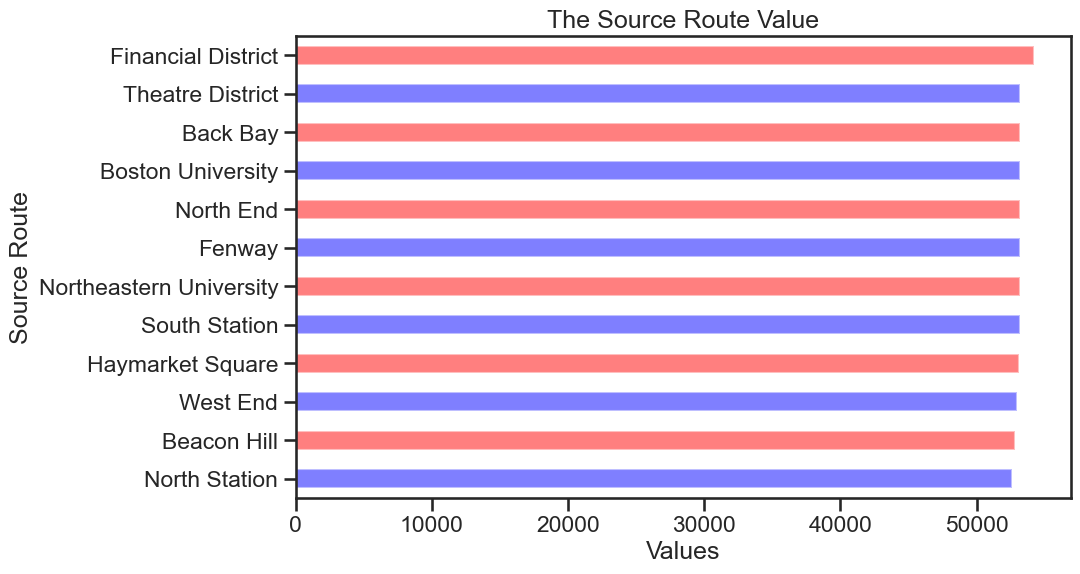

In [163]:
df_trans_source.plot(kind='barh', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Values')
plt.ylabel('Source Route')
plt.title('The Source Route Value')

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

#### 5.2.2 Destination

In [164]:
# view order data completed trip
df_trans_destination = df_clear['destination'].value_counts().sort_values()
df_trans_destination

destination
North Station              52577
Beacon Hill                52840
West End                   52992
South Station              53159
North End                  53164
Northeastern University    53165
Fenway                     53166
Haymarket Square           53171
Boston University          53171
Theatre District           53189
Back Bay                   53190
Financial District         54192
Name: count, dtype: int64

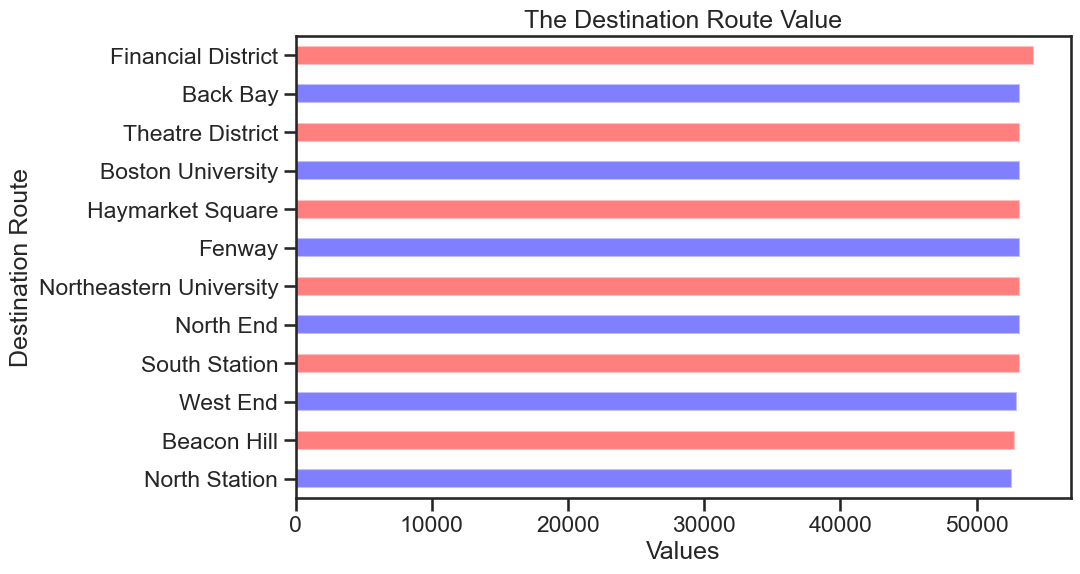

In [165]:
df_trans_destination.plot(kind='barh', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Values')
plt.ylabel('Destination Route')
plt.title('The Destination Route Value')


# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### 5.3 Cab Type

#### 5.3.1 Cab Type Value

In [166]:
# view car type data
df_trans_cabtyp= df_clear['cab_type'].value_counts().sort_values()
df_trans_cabtyp

cab_type
Lyft    307408
Uber    330568
Name: count, dtype: int64

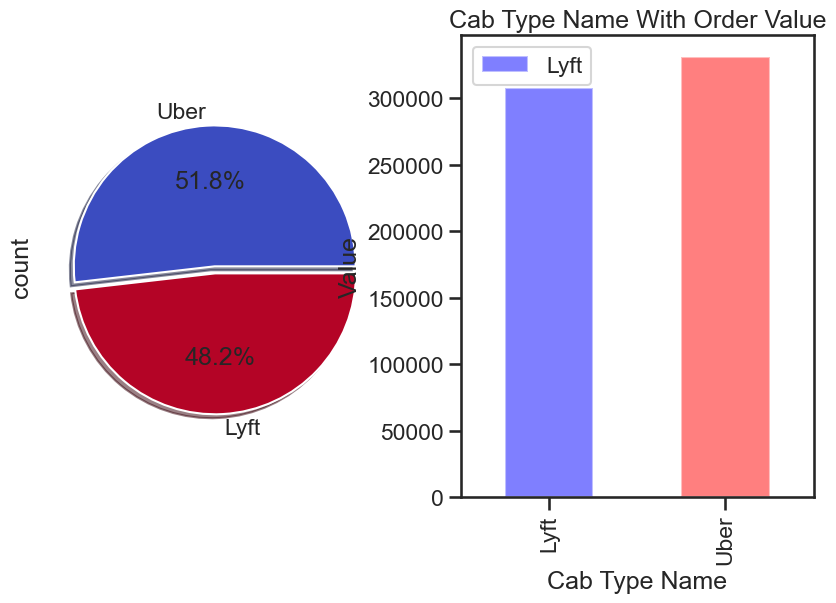

In [167]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
df_clear['cab_type'].value_counts().plot(
    kind='pie', 
    ax=ax[0], 
    autopct='%.1f%%',
    explode=[0,0.05], 
    cmap='coolwarm',
    shadow=True,
)    
df_trans_cabtyp.plot(kind='bar', figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Cab Type Name')
plt.ylabel('Value')
plt.title('Cab Type Name With Order Value')
plt.legend(labels=df_trans_cabtyp.index)

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

#### 5.3.2 Cab Type With Day Value 

In [168]:
df_day_cab =df_clear.groupby(by=["day","cab_type"]).size().reset_index(name="counts").set_index("cab_type")
df_day_cab

day  counts
cab_type             
Lyft        1   20289
Uber        1   21391
Lyft        2   19845
Uber        2   21453
Lyft        3   20021
Uber        3   21302
Lyft        4    5704
Uber        4    5923
Lyft        9     668
Uber        9     861
Lyft       10    1212
Uber       10    1322
Lyft       13   17005
Uber       13   18491
Lyft       14   20151
Uber       14   21193
Lyft       15   19906
Uber       15   21426
Lyft       16   20039
Uber       16   21320
Lyft       17   19685
Uber       17   21669
Lyft       18   15958
Uber       18   17371
Lyft       26   14000
Uber       26   15028
Lyft       27   33755
Uber       27   36380
Lyft       28   32791
Uber       28   35051
Lyft       29   26466
Uber       29   28756
Lyft       30   19913
Uber       30   21631

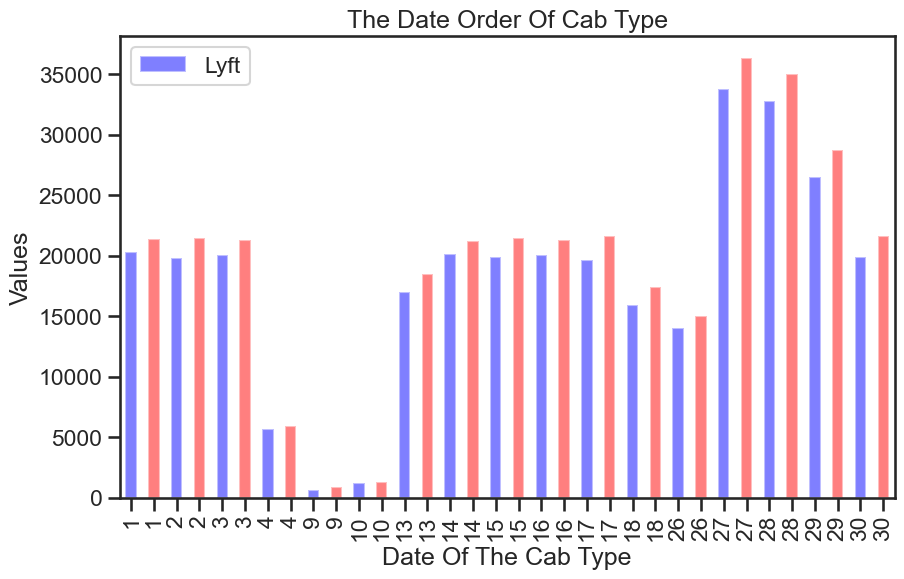

In [169]:
df_day_cab.plot(kind='bar', x="day", y="counts", figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Date Of The Cab Type')
plt.ylabel('Values')
plt.title('The Date Order Of Cab Type')
plt.legend(labels=df_day_cab.index)
df_day_cab

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

In [170]:
df_hour_cab =df_clear.groupby(by=["hour","cab_type"]).size().reset_index(name="counts").set_index("cab_type")
df_hour_cab

hour  counts
cab_type              
Lyft         0   14657
Uber         0   15215
Lyft         1   12669
Uber         1   13641
Lyft         2   12548
Uber         2   13775
Lyft         3   12224
Uber         3   13306
Lyft         4   12502
Uber         4   13623
Lyft         5   11155
Uber         5   11840
Lyft         6   11935
Uber         6   13212
Lyft         7   11024
Uber         7   11906
Lyft         8   10700
Uber         8   11637
Lyft         9   12948
Uber         9   13725
Lyft        10   13325
Uber        10   14593
Lyft        11   13372
Uber        11   14574
Lyft        12   13633
Uber        12   14384
Lyft        13   13503
Uber        13   14474
Lyft        14   13306
Uber        14   14670
Lyft        15   13394
Uber        15   14474
Lyft        16   13349
Uber        16   14623
Lyft        17   13853
Uber        17   14222
Lyft        18   13404
Uber        18   14554
Lyft        19   12461
Uber        19   12949
Lyft        20   11715
Uber        20   12905
Lyft        21   12480
Uber        21   13069
Lyft        22   13247
Uber        22   13846
Lyft        23   14004
Uber        23   15351

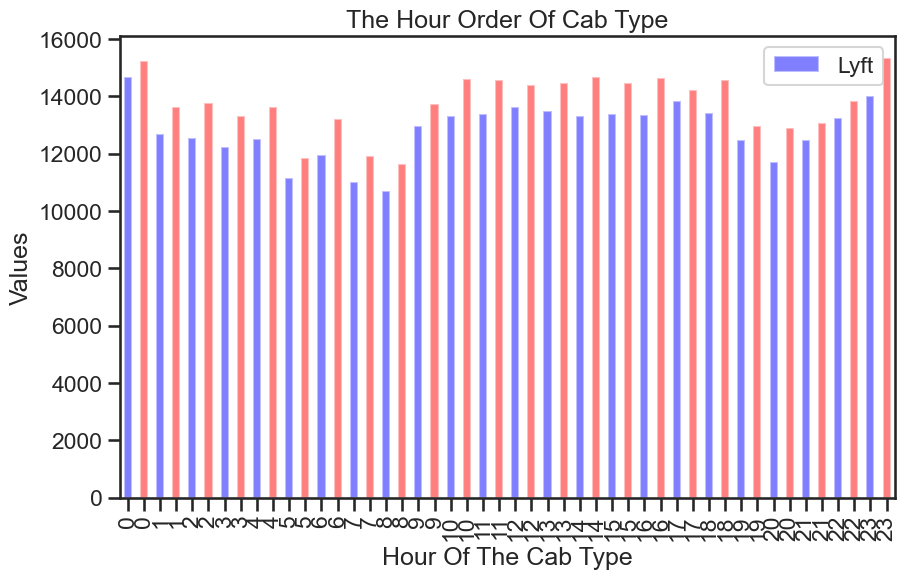

In [171]:
df_hour_cab.plot(kind='bar', x="hour", y="counts", figsize=(10,6), color=['blue','red'], alpha=0.5)

plt.xlabel('Hour Of The Cab Type')
plt.ylabel('Values')
plt.title('The Hour Order Of Cab Type')
plt.legend(labels=df_hour_cab.index)
df_hour_cab

# Save Plot
plt.savefig("transport_bar.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

plt.show()

### 5.4 Map to view maximum price

In [172]:
df_clear.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336960 -71.066178
            Fenway                   42.337740 -71.065822
            Haymarket Square         42.337087 -71.065110
            North End                42.338100 -71.066343
            Northeastern University  42.336668 -71.065314
...                                        ...        ...
West End    Fenway                   42.338291 -71.066356
            Haymarket Square         42.339314 -71.066239
            North End                42.337212 -71.066268
            Northeastern University  42.340015 -71.066646
            South Station            42.338983 -71.066967

[72 rows x 2 columns]

In [173]:
! pip install geopandas

In [174]:
map_1 = df_clear[df_clear['source']=='Haymarket Square']
df_map = folium.Map(location=[map_1["latitude"].mean(), map_1["longitude"].mean()],zoom_start = 10)
df_map.add_child(FastMarkerCluster(map_1[['latitude', 'longitude']].values.tolist(),color='green'))
df_map

In [175]:
print('Minimum price in our data :',df_clear.price.min())

Minimum price in our data : 2.5


In [176]:
min_price=df_clear[df_clear['price']==df_clear.price.min()]
min_price

id     timestamp  hour  day  month  \
5901    f6ed86e6-c3f1-42f5-9ce9-bb4bea19f18e  1.543448e+09    23   28     11   
7370    5c77b1f4-dbd3-4533-8ba9-ddc4af2ad740  1.545134e+09    11   18     12   
8623    9da5d7c6-cbf6-4dc9-a69f-3c57893ade01  1.543440e+09    21   28     11   
16675   1ad71e9a-d990-49be-8b77-6e94fb40f260  1.543299e+09     6   27     11   
17032   93192aa7-f773-4127-9a02-ab52d061d26a  1.543459e+09     2   29     11   
...                                      ...           ...   ...  ...    ...   
677015  7ed35758-7e46-4602-a0fe-d46276142fab  1.545115e+09     6   18     12   
679085  085a21fd-6b7a-4ffe-bc57-b467e4ef7982  1.543823e+09     7    3     12   
679217  eebce30a-3d96-4833-a8be-6a4c1c14b264  1.543350e+09    20   27     11   
679502  3f71f02f-e270-4140-ab47-d6ec4ff188f0  1.543290e+09     3   27     11   
683795  68937cd4-b36b-40f0-89d5-3de5288741b9  1.543730e+09     5    2     12   

                   datetime          timezone             source  \
5901    2018-11-28 23:33:41  America/New_York  Boston University   
7370    2018-12-18 11:45:10  America/New_York   Haymarket Square   
8623    2018-11-28 21:20:10  America/New_York      South Station   
16675   2018-11-27 06:06:21  America/New_York             Fenway   
17032   2018-11-29 02:29:08  America/New_York          North End   
...                     ...               ...                ...   
677015  2018-12-18 06:40:13  America/New_York   Haymarket Square   
679085  2018-12-03 07:38:01  America/New_York   Theatre District   
679217  2018-11-27 20:27:22  America/New_York           Back Bay   
679502  2018-11-27 03:36:22  America/New_York        Beacon Hill   
683795  2018-12-02 05:47:57  America/New_York           West End   

               destination cab_type product_id    name  price  distance  \
5901              Back Bay     Lyft  lyft_line  Shared    2.5      1.53   
7370           Beacon Hill     Lyft  lyft_line  Shared    2.5      1.39   
8623    Financial District     Lyft  lyft_line  Shared    2.5      0.65   
16675             Back Bay     Lyft  lyft_line  Shared    2.5      1.47   
17032        North Station     Lyft  lyft_line  Shared    2.5      0.98   
...                    ...      ...        ...     ...    ...       ...   
677015  Financial District     Lyft  lyft_line  Shared    2.5      0.99   
679085       South Station     Lyft  lyft_line  Shared    2.5      0.66   
679217       South Station     Lyft  lyft_line  Shared    2.5      1.33   
679502       South Station     Lyft  lyft_line  Shared    2.5      1.54   
683795              Fenway     Lyft  lyft_line  Shared    2.5      2.93   

        surge_multiplier  latitude  longitude  temperature  \
5901                 1.0   42.2148   -71.0330        39.35   
7370                 1.0   42.3661   -71.0631        24.71   
8623                 1.0   42.3519   -71.0551        41.35   
16675                1.0   42.2148   -71.0330        43.03   
17032                1.0   42.3429   -71.1003        37.92   
...                  ...       ...        ...          ...   
677015               1.0   42.3503   -71.0810        33.71   
679085               1.0   42.2148   -71.0330        47.27   
679217               1.0   42.3647   -71.0542        43.02   
679502               1.0   42.3661   -71.0631        43.73   
683795               1.0   42.3503   -71.0810        38.19   

        apparentTemperature    short_summary  \
5901                  33.00        Overcast    
7370                  12.26   Mostly Cloudy    
8623                  35.62        Overcast    
16675                 36.79      Light Rain    
17032                 31.91   Mostly Cloudy    
...                     ...              ...   
677015                25.35        Overcast    
679085                47.27        Overcast    
679217                37.56   Mostly Cloudy    
679502                37.84            Rain    
683795                38.19        Overcast    

                                         

In [177]:
print('Maximum price in our data :',df_clear.price.max())

Maximum price in our data : 97.5


In [178]:
max_price=df_clear[df_clear['price']==df_clear.price.max()]
max_price

id     timestamp  hour  day  month  \
597071  ba1593a1-e4fd-4c7a-a011-e2d4fccbf081  1.543714e+09     1    2     12   

                   datetime          timezone              source destination  \
597071  2018-12-02 01:28:02  America/New_York  Financial District      Fenway   

       cab_type   product_id          name  price  distance  surge_multiplier  \
597071     Lyft  lyft_luxsuv  Lux Black XL   97.5      4.43               2.0   

        latitude  longitude  temperature  apparentTemperature short_summary  \
597071   42.3503    -71.081        35.52                35.52        Clear    

                                      long_summary  precipIntensity  \
597071   Light rain in the morning and overnight.               0.0   

        precipProbability  humidity  windSpeed  windGust  windGustTime  \
597071                0.0      0.82       1.85      2.37    1543672800   

        visibility  temperatureHigh  temperatureHighTime  temperatureLow  \
597071       9.846            44.65           1543690800           34.88   

        temperatureLowTime  apparentTemperatureHigh  \
597071          1543712400                    43.98   

        apparentTemperatureHighTime  apparentTemperatureLow  \
597071                   1543690800                   35.53   

        apparentTemperatureLowTime           icon  dewPoint  pressure  \
597071                  1543712400   clear-night      30.46   1023.52   

        windBearing  cloudCover  uvIndex  visibility.1  ozone  sunriseTime  \
597071          146        0.12        0         9.846  274.6   1543665335   

        sunsetTime  moonPhase  precipIntensityMax  uvIndexTime  \
597071  1543698860       0.82                 0.0   1543683600   

        temperatureMin  temperatureMinTime  temperatureMax  \
597071           31.57          1543665600           44.65   

        temperatureMaxTime  apparentTemperatureMin  \
597071          1543690800                    28.1   

        apparentTemperatureMinTime  apparentTemperatureMax  \
597071                  1543658400                   43.98   

        apparentTemperatureMaxTime  
597071                  1543690800

In [179]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
map_max = df_clear[df_clear['source']=='Financial District']
df_map_max = folium.Map(location=[map_1["latitude"].mean(), map_1["longitude"].mean()],zoom_start = 10)
df_map_max.add_child(FastMarkerCluster(map_max[['latitude', 'longitude']].values.tolist(),color='green'))
df_map_max

## 6. Data Prepocessing
-----

### 6.1 Viewing Correlation Between Columns

#### 6.1.1 View Relationship with Temperature

In [180]:
temp_data= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [181]:
df_temperature = df_clear[temp_data]
df_temperature.head()

temperature  apparentTemperature  temperatureHigh  temperatureLow  \
0        42.34                37.12            43.68           34.19   
1        43.58                37.35            47.30           42.10   
2        38.33                32.93            47.55           33.10   
3        34.38                29.63            45.03           28.90   
4        37.44                30.88            42.18           36.71   

   apparentTemperatureHigh  apparentTemperatureLow  temperatureMin  \
0                    37.95                   27.39           39.89   
1                    43.92                   36.20           40.49   
2                    44.12                   29.11           35.36   
3                    38.53                   26.20           34.67   
4                    35.75                   30.29           33.10   

   temperatureHighTime  temperatureMax  apparentTemperatureMin  \
0           1544968800           43.68                   33.73   
1           1543251600           47.30                   36.20   
2           1543320000           47.55                   31.04   
3           1543510800           45.03                   30.30   
4           1543420800           42.18                   29.11   

   apparentTemperatureMax  price  
0                   38.07    5.0  
1                   43.92   11.0  
2                   44.12    7.0  
3                   38.53   26.0  
4                   35.75    9.0

<Axes: >

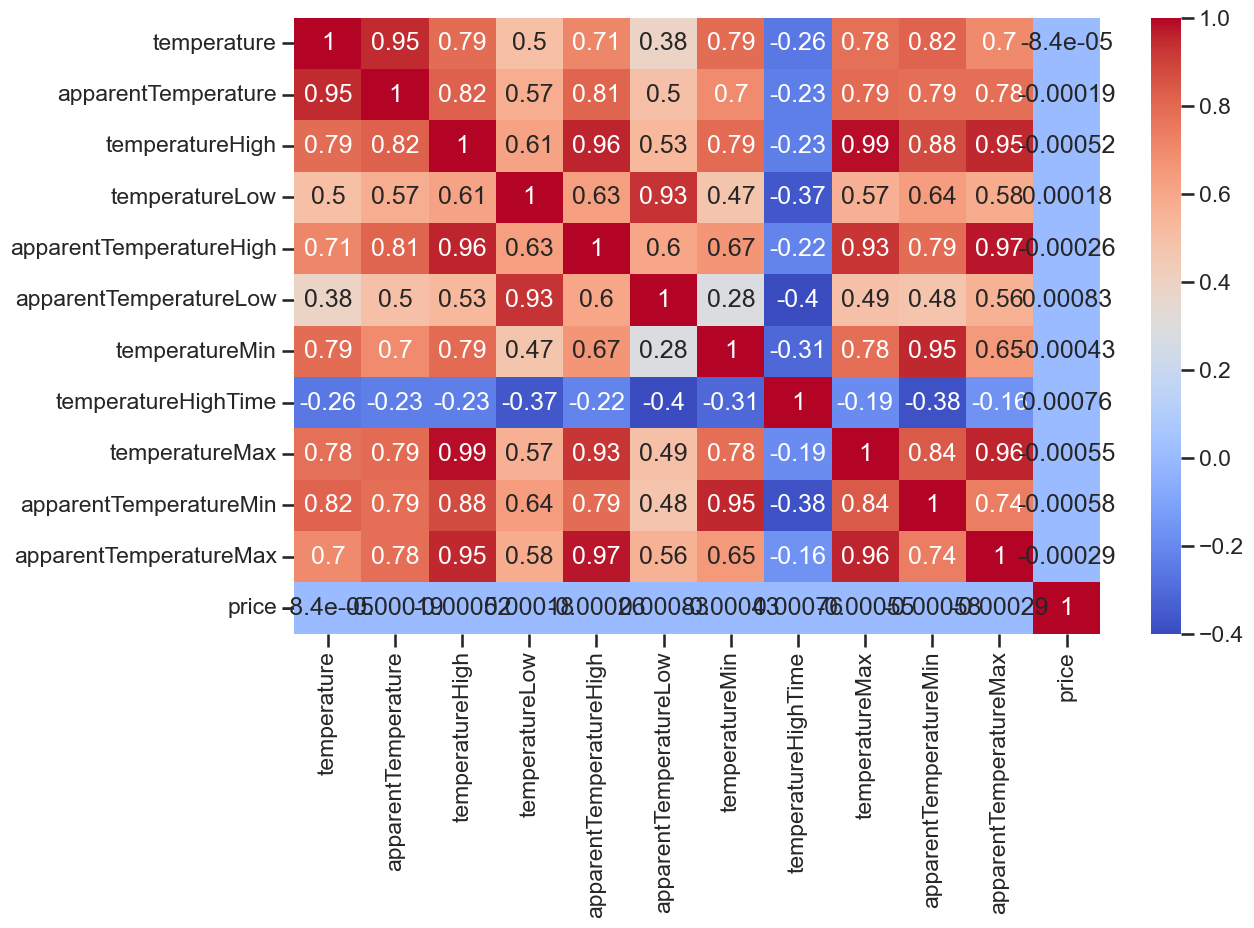

In [182]:
plt.figure(figsize=(13,8))
sns.heatmap(df_temperature.corr(),cmap='coolwarm' ,annot=True)

* Provisional results:
  
  It can be seen that in the data related to low temperature the correlation is

#### 6.1.2 Columns related to climate

In [183]:
climate_data = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']

In [184]:
df_climate = df_clear[climate_data]
df_climate.head()

precipIntensity  precipProbability  humidity  windSpeed  windGust  \
0           0.0000                0.0      0.68       8.66      9.17   
1           0.1299                1.0      0.94      11.98     11.98   
2           0.0000                0.0      0.75       7.33      7.33   
3           0.0000                0.0      0.73       5.28      5.28   
4           0.0000                0.0      0.70       9.14      9.14   

   visibility  dewPoint  pressure  windBearing  cloudCover  uvIndex  ozone  \
0      10.000     32.70   1021.98           57        0.72        0  303.8   
1       4.786     41.83   1003.97           90        1.00        0  291.1   
2      10.000     31.10    992.28          240        0.03        0  315.7   
3      10.000     26.64   1013.73          310        0.00        0  291.1   
4      10.000     28.61    998.36          303        0.44        0  347.7   

   moonPhase  precipIntensityMax  price  
0       0.30              0.1276    5.0  
1       0.64              0.1300   11.0  
2       0.68              0.1064    7.0  
3       0.75              0.0000   26.0  
4       0.72              0.0001    9.0

<Axes: >

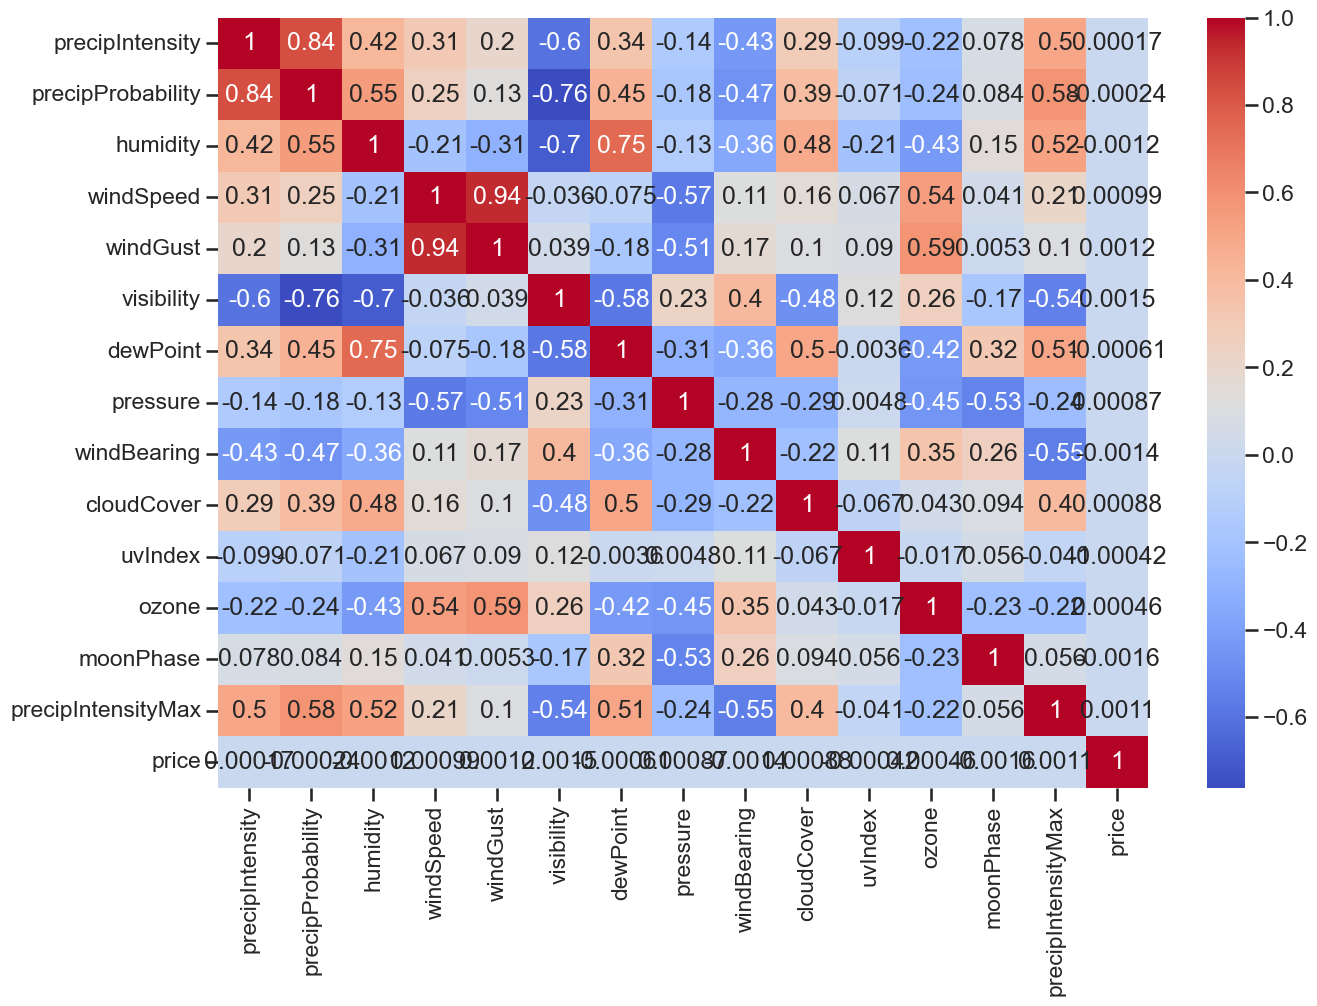

In [185]:
plt.figure(figsize=(15,10))
sns.heatmap(df_climate.corr(),cmap='coolwarm' ,annot=True)

* Provisional results:
  
  It can be seen that the data related to climate data has low correlation.

### 6.2 Removing columns that have low correlation

In [186]:
df_clear_new = df_clear.drop(['id','timestamp','latitude','longitude','datetime','temperature','apparentTemperature','temperatureHigh','temperatureHighTime','temperatureLow','apparentTemperatureHigh',
                              'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
df_clear_new.shape

(637976, 16)

In [187]:
df_clear_new.head()

hour  day  month          timezone            source    destination  \
0     9   16     12  America/New_York  Haymarket Square  North Station   
1     2   27     11  America/New_York  Haymarket Square  North Station   
2     1   28     11  America/New_York  Haymarket Square  North Station   
3     4   30     11  America/New_York  Haymarket Square  North Station   
4     3   29     11  America/New_York  Haymarket Square  North Station   

  cab_type    product_id          name  price  distance  surge_multiplier  \
0     Lyft     lyft_line        Shared    5.0      0.44               1.0   
1     Lyft  lyft_premier           Lux   11.0      0.44               1.0   
2     Lyft          lyft          Lyft    7.0      0.44               1.0   
3     Lyft   lyft_luxsuv  Lux Black XL   26.0      0.44               1.0   
4     Lyft     lyft_plus       Lyft XL    9.0      0.44               1.0   

     short_summary                                       long_summary  \
0   Mostly Cloudy                           Rain throughout the day.    
1            Rain    Rain until morning, starting again in the eve...   
2           Clear                         Light rain in the morning.    
3           Clear                  Partly cloudy throughout the day.    
4   Partly Cloudy                  Mostly cloudy throughout the day.    

                    icon  visibility.1  
0   partly-cloudy-night         10.000  
1                  rain          4.786  
2           clear-night         10.000  
3           clear-night         10.000  
4   partly-cloudy-night         10.000

#### 6.2.1 Delete unique data

In [188]:
cat_col = df_clear_new.select_dtypes(include=['object','category']).columns.tolist()
for column in df_clear_new[cat_col]:
    print(f'{column} : {df_clear_new[column].unique()}')
    print()

timezone : ['America/New_York']

source : ['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']

destination : ['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']

cab_type : ['Lyft' 'Uber']

product_id : ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']

name : ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']

short_summary : [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Clou

* Provisional Results:
  In the unique data that appears, it can be seen that the timezone data is only found in America/New York and product_id has many different number series, so it can be minimized to be deleted.

In [189]:
df_clear_new2 = df_clear_new.drop(['timezone','product_id'], axis=1)

In [190]:
# view the overall column
pd.set_option("display.max.columns", None) 
df_clear_new2.head()

hour  day  month            source    destination cab_type          name  \
0     9   16     12  Haymarket Square  North Station     Lyft        Shared   
1     2   27     11  Haymarket Square  North Station     Lyft           Lux   
2     1   28     11  Haymarket Square  North Station     Lyft          Lyft   
3     4   30     11  Haymarket Square  North Station     Lyft  Lux Black XL   
4     3   29     11  Haymarket Square  North Station     Lyft       Lyft XL   

   price  distance  surge_multiplier    short_summary  \
0    5.0      0.44               1.0   Mostly Cloudy    
1   11.0      0.44               1.0            Rain    
2    7.0      0.44               1.0           Clear    
3   26.0      0.44               1.0           Clear    
4    9.0      0.44               1.0   Partly Cloudy    

                                        long_summary                   icon  \
0                          Rain throughout the day.    partly-cloudy-night    
1   Rain until morning, starting again in the eve...                  rain    
2                        Light rain in the morning.            clear-night    
3                 Partly cloudy throughout the day.            clear-night    
4                 Mostly cloudy throughout the day.    partly-cloudy-night    

   visibility.1  
0        10.000  
1         4.786  
2        10.000  
3        10.000  
4        10.000

#### 6.2.2 View the object column

In [191]:
df_clear_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
 10  short_summary     637976 non-null  object 
 11  long_summary      637976 non-null  object 
 12  icon              637976 non-null  object 
 13  visibility.1      637976 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 73.0+ MB


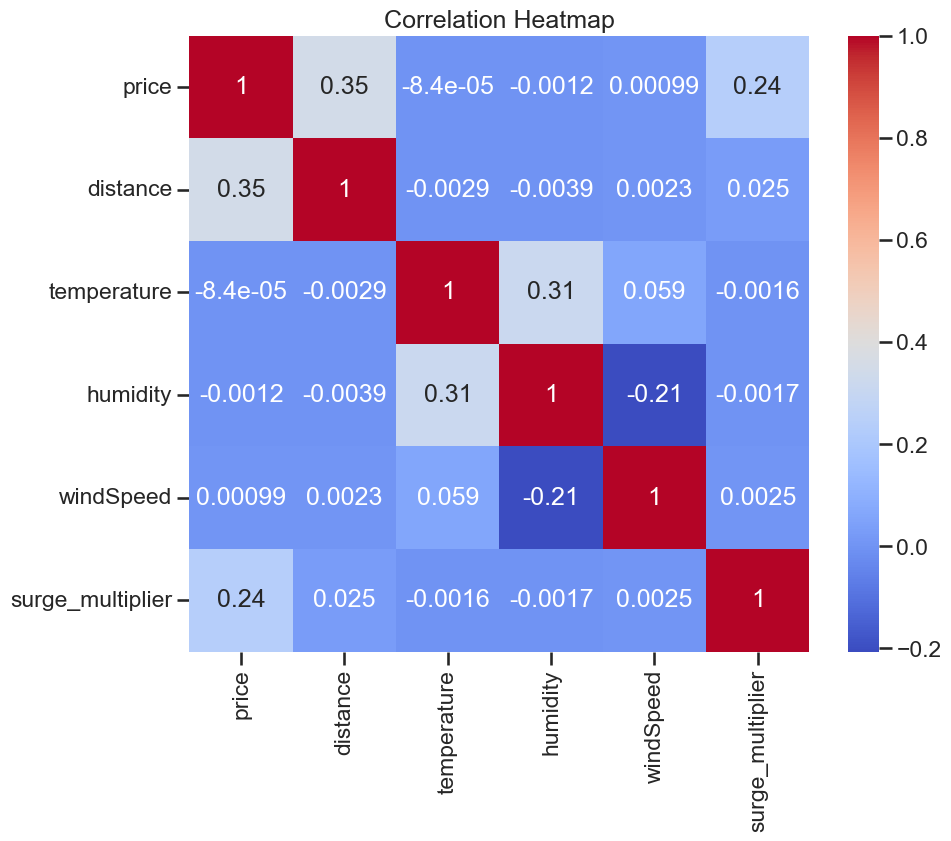

In [192]:
numerical_cols = ['price', 'distance', 'temperature', 'humidity', 'windSpeed','surge_multiplier']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Here are the Correlations of the various numeric columns that I have selected, but most of them are weakly correlated, if we assume that the price we want to detect, then all the correlations that have been selected are still weak.

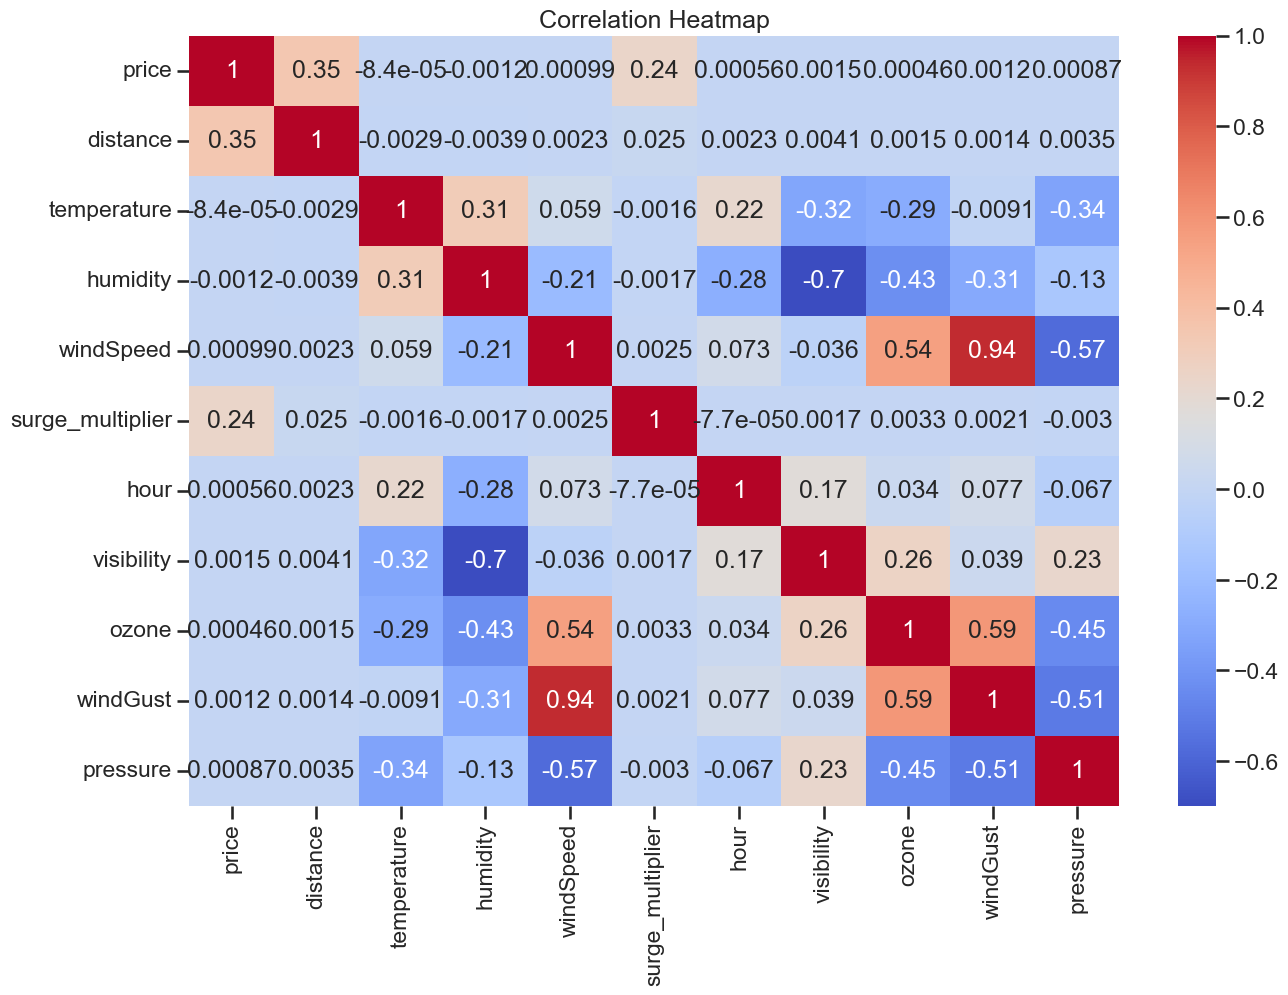

In [193]:
numerical_cols = ['price', 'distance', 'temperature', 'humidity', 'windSpeed','surge_multiplier','hour','visibility','ozone','windGust','pressure']
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

It can be seen that the entire correlation used is almost all unrelated but there are only a few that have a weak correlation, namely 
1. distance
2. surge_multiplier

this will be used as a predictive variable for our target variable **Price**

In [194]:
df_clear_new2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 637976 entries, 0 to 693070
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   hour              637976 non-null  int64  
 1   day               637976 non-null  int64  
 2   month             637976 non-null  int64  
 3   source            637976 non-null  object 
 4   destination       637976 non-null  object 
 5   cab_type          637976 non-null  object 
 6   name              637976 non-null  object 
 7   price             637976 non-null  float64
 8   distance          637976 non-null  float64
 9   surge_multiplier  637976 non-null  float64
 10  short_summary     637976 non-null  object 
 11  long_summary      637976 non-null  object 
 12  icon              637976 non-null  object 
 13  visibility.1      637976 non-null  float64
dtypes: float64(4), int64(3), object(7)
memory usage: 73.0+ MB


#### 6.2.3 Delete columns that are lowly related

In [195]:
df_clear = df_clear_new2.drop(['hour','day','month',
                               'source', 'destination','long_summary',
                               'icon'],axis=1)
df_clear.head()

cab_type          name  price  distance  surge_multiplier    short_summary  \
0     Lyft        Shared    5.0      0.44               1.0   Mostly Cloudy    
1     Lyft           Lux   11.0      0.44               1.0            Rain    
2     Lyft          Lyft    7.0      0.44               1.0           Clear    
3     Lyft  Lux Black XL   26.0      0.44               1.0           Clear    
4     Lyft       Lyft XL    9.0      0.44               1.0   Partly Cloudy    

   visibility.1  
0        10.000  
1         4.786  
2        10.000  
3        10.000  
4        10.000

#### 6.2.4 Rename the column used

In [196]:
# Rename the column used
df_clear.rename(columns={
    "cab_type": "transportation name", 
    "name": "transportation type", 
    "short_summary": "weather",
    "surge_multiplier": "surge multiplier",
    "visibility.1": "visibility"}, inplace=True)


In [197]:
df_clear.head()

transportation name transportation type  price  distance  surge multiplier  \
0                Lyft              Shared    5.0      0.44               1.0   
1                Lyft                 Lux   11.0      0.44               1.0   
2                Lyft                Lyft    7.0      0.44               1.0   
3                Lyft        Lux Black XL   26.0      0.44               1.0   
4                Lyft             Lyft XL    9.0      0.44               1.0   

           weather  visibility  
0   Mostly Cloudy       10.000  
1            Rain        4.786  
2           Clear       10.000  
3           Clear       10.000  
4   Partly Cloudy       10.000

#### 6.2.5 Removing Price Outliers

In [198]:
Qp12 = df_clear['price'].quantile(0.25)
Qp32 = df_clear['price'].quantile(0.75)
IQRp = Qp32-Qp12

In [199]:
df_clear[df_clear['price']>(Qp32+(1.5*IQRp))]

transportation name transportation type  price  distance  \
706                   Lyft           Lux Black   52.5      3.25   
707                   Lyft        Lux Black XL   67.5      3.25   
769                   Lyft        Lux Black XL   45.5      4.76   
1094                  Lyft        Lux Black XL   45.5      4.31   
1318                  Lyft        Lux Black XL   45.5      5.33   
...                    ...                 ...    ...       ...   
692439                Uber           Black SUV   47.0      5.56   
692698                Lyft        Lux Black XL   52.5      4.58   
692891                Lyft        Lux Black XL   47.5      5.42   
692962                Uber           Black SUV   51.0      7.36   
693007                Uber           Black SUV   49.5      7.36   

        surge multiplier          weather  visibility  
706                 2.00   Partly Cloudy        9.899  
707                 2.00   Partly Cloudy        9.827  
769                 1.00   Partly Cloudy        9.962  
1094                1.00      Light Rain        2.030  
1318                1.00        Overcast        9.608  
...                  ...              ...         ...  
692439              1.00   Mostly Cloudy        9.808  
692698              1.25   Partly Cloudy        9.641  
692891              1.00           Foggy        1.460  
692962              1.00   Mostly Cloudy        9.889  
693007              1.00   Mostly Cloudy        9.926  

[5589 rows x 7 columns]

In [200]:
df_clear[df_clear['price']<(Qp12-(1.5*IQRp))]

Empty DataFrame
Columns: [transportation name, transportation type, price, distance, surge multiplier, weather, visibility]
Index: []

In [201]:
print('Size dimention before removing :',df_clear.shape)
df_clear= df_clear[~((df_clear['price']>(Qp32+(1.5*IQRp))))]
print('Size dimention after removing :',df_clear.shape)

Size dimention before removing : (637976, 7)
Size dimention after removing : (632387, 7)


## 7. Definition Model
-----


After performing data cleaning and data preprocessing, a new dataframe is obtained that will be used in the next stage. There are 6 attributes that will be used to create a fare prediction model, namely Service, Vehicle, Start, Destination, Distance, and Surge_multiplier.

The testing methods that will be implemented in this project are Linear Regression, Random Forest, and Decision Tree Regressor methods. 

There are various metrics to measure the performance of regression models. However, this project will use R-squares and RMSE (Root-mean-square-error) metrics to measure model performance.

## 8. Modeling
______

#### 8.1 Encoding

In [202]:
# Perform encoding with Label Encoder on attributes that have Object data type
class MultiColumnLabelEncoder:
    def __init__(self, columns=None):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname, col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


encoding_pipeline = Pipeline([
    ('encoding', MultiColumnLabelEncoder(columns =["transportation name","transportation type","price","distance","surge multiplier","weather","visibility"]))
])

# Create a df_rfe variable to hold the encode result
df_encode = encoding_pipeline.fit_transform(df_clear)
df_encode.head()

transportation name  transportation type  price  distance  \
0                    0                    7      4        15   
1                    0                    2     20        15   
2                    0                    5      8        15   
3                    0                    4     53        15   
4                    0                    6     14        15   

   surge multiplier  weather  visibility  
0                 0        4         226  
1                 0        8          57  
2                 0        0         226  
3                 0        0         226  
4                 0        6         226

In [203]:
df_encode.columns

Index(['transportation name', 'transportation type', 'price', 'distance',
       'surge multiplier', 'weather', 'visibility'],
      dtype='object')

#### 8.2 Train and Split Data

In [204]:
X = df_encode.drop(columns=['price'],axis=1).values
y = df_encode['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=350)

In [205]:
X.shape

(632387, 6)

In [206]:
y.shape

(632387,)

In [207]:
lr = LinearRegression()

In [208]:
# Fit to data training
model_lr = lr.fit(X_train,y_train)
y_pred_lr=model_lr.predict(X_test)

In [209]:
# intercept value
print(("nilai intercept:"),model_lr.intercept_)

# coefficient value
print(("nilai koefisien:"),lr.coef_)

nilai intercept: 36.75502387251289
nilai koefisien: [ 5.34294365e+00 -3.67961587e+00  6.10861322e-02  7.27494170e+00
  6.51723909e-03 -1.96173706e-04]


In [210]:
lr_mse = mean_squared_error(y_test,y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
print('Linear Regression MSE: %.4f' % lr_mse)
print('Linear Regression RMSE: %.4f' % lr_rmse)

Linear Regression MSE: 197.1480
Linear Regression RMSE: 14.0409


#### 8.3 Linear Regression

In [211]:
r2_lr_train = model_lr.score(X_train, y_train)
r2_lr_test = model_lr.score(X_test, y_test)

# View the r-square value of the testing and training values
print(("Nilai R-squared Training Linear Regression:"),r2_lr_train)
print(("Nilai R-squared Testing Linear Regression:"),r2_lr_test)


Nilai R-squared Training Linear Regression: 0.5083039792551709
Nilai R-squared Testing Linear Regression: 0.5084783823738425


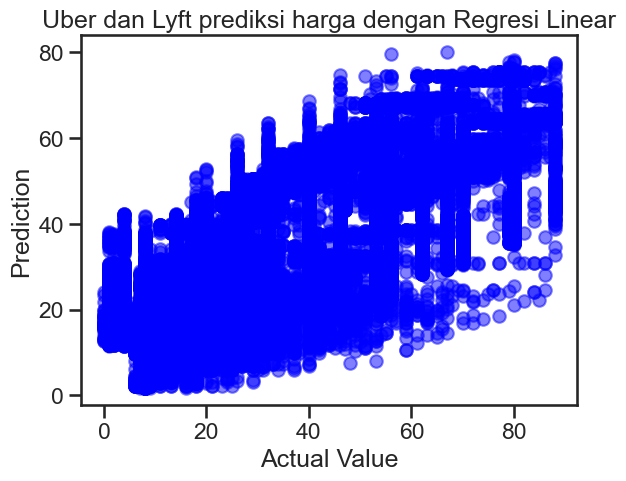

In [212]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = plt.axes()

ax.scatter(y_test, y_pred_lr, alpha=.5, color='blue')

ax.set(xlabel='Actual Value', 
       ylabel='Prediction',
       title='Uber dan Lyft prediksi harga dengan Regresi Linear');

* Conclusion:
  
  Based on the scatter plot visualization, the difference between the actual value and the prediction forms a straight line pattern from the bottom left to the top right, indicating that both train and test data are positively related.

## 9. Model Evaluation
-----

In [213]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True],
                'copy_X':[True],
                'n_jobs':[1000]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score'])

find_best_model_using_gridsearchcv(X,y)

model  best_score
0  linear_regression    0.509159

In [214]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

import warnings
warnings.filterwarnings('ignore')

find_best_model_using_gridsearchcv(X,y)

model  best_score  \
0          lasso    0.482522   
1  decision_tree    0.940931   

                                         best_params  
0                {'alpha': 1, 'selection': 'cyclic'}  
1  {'criterion': 'friedman_mse', 'splitter': 'ran...

#### 9.1 Load Model Evaluation With Decision Tree Regressor

In [215]:
# Creating a Decision Tree model
model_eval2 = DecisionTreeRegressor(criterion= 'friedman_mse', splitter= 'best')

In [216]:
# Train the model using the training set
dtc_model = model_eval2.fit(X_train, y_train)
predictions_dtc = dtc_model.predict(X_test)
dtc_train_r2 = model_eval2.score(X_train,y_train)
dtc_test_r2 = model_eval2.score(X_test, y_test)
print('Decision Tree train R squared : %.4f' % dtc_train_r2)
print('Decision Tree test R squared": %.4f' % dtc_test_r2)

Decision Tree train R squared : 0.9845
Decision Tree test R squared": 0.9414


In [217]:
dtc_mse = mean_squared_error(predictions_dtc, y_test)
dtc_rmse = np.sqrt(dtc_mse)
print('Decision Tree Regressor MSE: %.4f' % dtc_mse)
print('Decision Tree Regressor RMSE: %.4f' % dtc_rmse)

Decision Tree Regressor MSE: 23.5195
Decision Tree Regressor RMSE: 4.8497


#### 9.2 Load Model Evaluation With Random Forest Regressor

In [218]:
# Create a random forest testing model 
model_eval3 = RandomForestRegressor(n_estimators = 60, random_state = 15)

In [219]:
model_rfr = model_eval3.fit(X_train,y_train)

In [220]:
y_predict_rfr = model_rfr.predict(X_test)
r2_rfr_train = model_eval3.score(X_train, y_train)
r2_rfr_test = model_eval3.score(X_test, y_test)

# Determining the r-square value of the testing and training values
print(("Nilai R-squared Training Random Forest:"),r2_rfr_train)
print(("Nilai R-squared Testing Random Forest:"),r2_rfr_test)

Nilai R-squared Training Random Forest: 0.9819100656550259
Nilai R-squared Testing Random Forest: 0.9553873847508146


## 10. Model Inference
-----

In [221]:
df_encode.head()

transportation name  transportation type  price  distance  \
0                    0                    7      4        15   
1                    0                    2     20        15   
2                    0                    5      8        15   
3                    0                    4     53        15   
4                    0                    6     14        15   

   surge multiplier  weather  visibility  
0                 0        4         226  
1                 0        8          57  
2                 0        0         226  
3                 0        0         226  
4                 0        6         226

In [222]:
explore = {'transportation name': [0, 1, 2, 3], 'transportation type': [0, 1, 2, 3], 'distance': [10, 15, 20, 30], 'surge multiplier': [0, 1, 2, 3], 'weather': [0, 1.25, 2, 3], 'distance': [0, 1, 2, 3],
        'visibility': [100, 200, 300, 400]}
explore = pd.DataFrame(explore)

In [223]:
price_predict_lr= model_lr.predict(explore)
print('Prediksi Harga Transportasi Online Dengan Linear Regression: ')
print(price_predict_lr)

Prediksi Harga Transportasi Online Dengan Linear Regression: 
[36.7354065  45.72329129 54.70791745 63.69417292]


In [224]:
price_predict_dtr = dtc_model.predict(explore)
print('Prediksi Harga Transportasi Online Dengan Decision Tree: ')
print(price_predict_dtr)

Prediksi Harga Transportasi Online Dengan Decision Tree: 
[18. 56. 56. 56.]


## 11. Conclusion
-----

In [225]:
print(("Nilai R-squared Training Linear Regression:"),r2_lr_train)
print(("Nilai R-squared Testing Linear Regression:"),r2_lr_test)
print('Decision Tree train R squared : %.4f' % dtc_train_r2)
print('Decision Tree test R squared": %.4f' % dtc_test_r2)

Nilai R-squared Training Linear Regression: 0.5083039792551709
Nilai R-squared Testing Linear Regression: 0.5084783823738425
Decision Tree train R squared : 0.9845
Decision Tree test R squared": 0.9414


After exploring the data and building the model, the following conclusions can be drawn:
1. The data still has many outliers and for the sales price distribution comparison, it is clear that lyft has the highest median.
2. The analysis of the distribution of operating hours on the "Uber vs Lyft" dataset provides an overview of the distribution of trips in a day by hour. This can provide insight into the pattern of user demand at various hours of the day. through this visualization we can see the pattern of usage demand at certain hours. for example, many people order at 00:00.
3. More people use Uber at financial district destinations than Lyft.
4. The average trip price ranges from 16.50 to 16.60, with relatively small variations between certain hours.
5.  Correlation is weak enough to add categorical data 5.
6.  For a better model, use the linear regression model2, where this model produces an R-squared of 48, and an error of 42 is a model that has additional features, namely cab_type and name that have been encoded.
7. for even better use of random forest because the r-squared result is 94 while the MSE is only 4 which is a fairly small error.